In [23]:
import numpy as np
from sklearn.metrics import *
%matplotlib inline
from pylab import *

In [15]:
expr = np.array([2, 3, 5, 4, 9, 15])
target = np.array(["A", "B", "C", "A", "B", "C"])
labels = target == "A"

In [16]:
expr

array([ 2,  3,  5,  4,  9, 15])

In [45]:
fpr, tpr, thres = roc_curve(labels, expr, pos_label=True, drop_intermediate=False)

In [50]:
roc_auc_score(labels, 100-expr)

0.875

In [51]:
from random import shuffle

In [52]:
l = list(range(1000))

In [54]:
l

[104,
 383,
 389,
 851,
 448,
 398,
 945,
 376,
 873,
 265,
 822,
 379,
 713,
 998,
 39,
 791,
 51,
 616,
 686,
 342,
 63,
 803,
 331,
 140,
 738,
 979,
 985,
 176,
 757,
 44,
 489,
 571,
 658,
 291,
 130,
 186,
 503,
 595,
 92,
 106,
 150,
 961,
 131,
 428,
 989,
 173,
 227,
 502,
 8,
 539,
 773,
 71,
 476,
 680,
 511,
 971,
 338,
 332,
 37,
 859,
 437,
 43,
 655,
 960,
 631,
 702,
 264,
 54,
 782,
 684,
 802,
 333,
 303,
 734,
 461,
 554,
 148,
 411,
 594,
 843,
 276,
 442,
 107,
 113,
 80,
 24,
 282,
 237,
 89,
 160,
 3,
 1,
 183,
 445,
 13,
 739,
 762,
 983,
 778,
 232,
 562,
 169,
 123,
 69,
 128,
 453,
 258,
 27,
 559,
 354,
 722,
 521,
 30,
 930,
 432,
 76,
 433,
 968,
 593,
 870,
 192,
 548,
 317,
 409,
 763,
 32,
 910,
 880,
 380,
 860,
 520,
 10,
 175,
 784,
 267,
 635,
 715,
 865,
 604,
 275,
 626,
 551,
 377,
 687,
 996,
 200,
 246,
 188,
 596,
 222,
 465,
 230,
 948,
 456,
 603,
 829,
 841,
 28,
 812,
 466,
 721,
 296,
 180,
 302,
 905,
 697,
 219,
 247,
 855,
 808,
 920,


/pstore/apps/Anaconda3/2.5.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


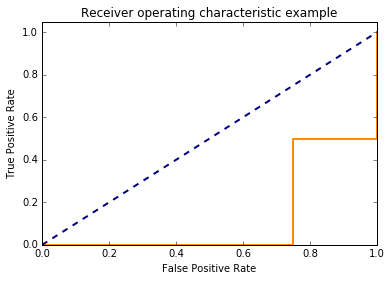

In [49]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1]:
from pygenesig.validation import cross_validate_signatures
from pygenesig.gini import GiniSignatureGenerator
from pygenesig.bioqc import BioQCSignatureTester

expr_file = "../data/gtex/exprs.npy"
target_file = "../data/gtex/target.csv"

signature_list, result_list = cross_validate_signatures(expr_file,
                                                        target_file,
                                                        GiniSignatureGenerator,
                                                        BioQCSignatureTester)

In [9]:
signature_list[0]

Delayed('getitem-1522128fa24b69a22f2e81ef7b7636fb')

In [6]:
import dask.multiprocessing
import dask.threaded
from dask.base import compute

signature_futures, result_futures = compute(signature_list, result_list,
                                            get=dask.threaded.get,
                                            num_workers=3)



/pstore/home/sturmg/projects/gene-set-study/pygenesig/bioqc.py:139: RuntimeWarning: divide by zero encountered in log10
  bioqc_res_log = -np.log10(bioqc_res)


In [7]:
signatures = [f.result() for f in signature_futures]


AttributeError: 'dict' object has no attribute 'result'

In [ ]:
confusion_matrices = [f.result() for f in result_futures]

In [1]:
import readline
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from pygenesig.validation import SignatureTester
from pygenesig.tools import write_gmt
import sklearn.metrics
import numpy as np
from pygenesig.validation import SignatureGenerator
import tempfile
numpy2ri.activate()
import pandas as pd
from rpy2.robjects import pandas2ri, Formula
pandas2ri.activate()
import rpy2.robjects
from IPython.display import display

base = importr("base")
stats = importr("stats")
edge_r = importr("edgeR")
limma = importr("limma")

In [2]:
expr = np.load("../data/gtex/exprs_counts.npy")

In [3]:
target = np.genfromtxt("../data/gtex/target.csv", dtype=str, delimiter=",")

In [4]:
covariates = pd.read_csv("../data/gtex/covariates.csv", index_col=0)

In [5]:
genes = np.array([str(i) for i in range(expr.shape[0])])

In [6]:
expr.shape

(56318, 8525)

In [7]:
genes.shape

(56318,)

In [8]:
dg_list = edge_r.DGEList(counts=expr, genes=genes)

In [101]:
len(set(covariates.SMTS))

27

In [10]:
df = base.data_frame(covariates)

In [105]:
fmla = Formula("~ x1 + x2 + x3")
env = fmla.environment
env['x1'] = base.as_factor(covariates.SMTS)
env['x2'] = covariates.RIN
env['x3'] = base.as_factor(covariates.Gender)

In [100]:
base.length(base.levels(base.as_factor(covariates.SMTS)))

R object with classes: ('integer',) mapped to:
<IntVector - Python:0x2aae19ec82c8 / R:0x269b44f8>
[      27]

In [108]:
cpm = edge_r.cpm(dg_list)

In [109]:
cpm_cnt = np.sum(np.array(cpm) > 1, axis=1)

In [110]:
cpm_inds = cpm_cnt >= 10

In [111]:
expr_fil = expr[cpm_inds, :]
genes_fil = genes[cpm_inds]

In [112]:
dg_list_fil = edge_r.DGEList(counts=expr_fil, genes=genes_fil)

In [113]:
dg_list_fil2 = edge_r.calcNormFactors(dg_list_fil)

In [114]:
voom_res = limma.voom(dg_list_fil2, design_mat, plot=False)

In [115]:
lm_fit = limma.lmFit(voom_res, design_mat)

In [116]:
fit_e = limma.treat(lm_fit, lfc=np.log2(100))

In [117]:
p_adj = .01 / base.nrow(lm_fit)[0]

In [118]:
rslt = limma.decideTests(fit_e, p_value=p_adj)

In [119]:
colnames = np.array(base.colnames(rslt))

In [120]:
colnames

array(['(Intercept)', 'x1Adrenal Gland', 'x1Blood', 'x1Blood Vessel',
       'x1Brain', 'x1Breast', 'x1Colon', 'x1Esophagus', 'x1Heart',
       'x1Kidney', 'x1Liver', 'x1Lung', 'x1Muscle', 'x1Nerve', 'x1Ovary',
       'x1Pancreas', 'x1Pituitary', 'x1Prostate', 'x1Salivary Gland',
       'x1Skin', 'x1Small Intestine', 'x1Spleen', 'x1Stomach', 'x1Testis',
       'x1Thyroid', 'x1Uterus', 'x1Vagina', 'x2', 'x3Male'], 
      dtype='<U17')

In [121]:
np_rslt = np.array(rslt)

In [122]:
tissue_cols = np.array([True if col.startswith('x1') else False for col in colnames])
np_rslt = np_rslt[:, tissue_cols]

In [123]:
tissues = np.array([col[2:] for col in colnames[tissue_cols]])
assert len(tissues) == np_rslt.shape[1]

Translate back to row numbers before filtering

In [124]:
row_inds = np.where(cpm_inds)[0]

In [125]:
signatures = {}
for i, tissue in enumerate(tissues):
    signatures[tissue] = list(row_inds[np_rslt[:, i] == 1])    

In [80]:
signatures

{'Adrenal Gland': [9,
  34,
  35,
  36,
  92,
  94,
  99,
  102,
  122,
  133,
  134,
  148,
  165,
  181,
  217,
  231,
  254,
  263,
  274,
  284,
  300,
  314,
  322,
  340,
  347,
  392,
  399,
  489,
  500,
  509,
  569,
  576,
  593,
  594,
  606,
  622,
  640,
  646,
  655,
  666,
  673,
  724,
  730,
  768,
  780,
  838,
  877,
  878,
  883,
  887,
  953,
  973,
  1000,
  1005,
  1012,
  1036,
  1068,
  1091,
  1101,
  1131,
  1138,
  1144,
  1202,
  1233,
  1299,
  1321,
  1332,
  1373,
  1418,
  1438,
  1444,
  1462,
  1587,
  1597,
  1598,
  1633,
  1688,
  1717,
  1741,
  1887,
  1898,
  2005,
  2075,
  2122,
  2162,
  2187,
  2228,
  2246,
  2273,
  2299,
  2347,
  2369,
  2398,
  2459,
  2529,
  2555,
  2557,
  2603,
  2631,
  2712,
  2815,
  3022,
  3029,
  3033,
  3035,
  3041,
  3077,
  3079,
  3112,
  3114,
  3123,
  3124,
  3145,
  3173,
  3177,
  3178,
  3188,
  3190,
  3201,
  3205,
  3209,
  3215,
  3216,
  3223,
  3230,
  3250,
  3252,
  3257,
  3262,
  3274,
  3

In [126]:
{
    tissue: len(genes) for tissue, genes in signatures.items()
}

{'Adrenal Gland': 83,
 'Blood': 61,
 'Blood Vessel': 3,
 'Brain': 464,
 'Breast': 0,
 'Colon': 24,
 'Esophagus': 3,
 'Heart': 144,
 'Kidney': 166,
 'Liver': 432,
 'Lung': 63,
 'Muscle': 237,
 'Nerve': 32,
 'Ovary': 40,
 'Pancreas': 265,
 'Pituitary': 264,
 'Prostate': 82,
 'Salivary Gland': 179,
 'Skin': 163,
 'Small Intestine': 240,
 'Spleen': 146,
 'Stomach': 74,
 'Testis': 1871,
 'Thyroid': 100,
 'Uterus': 14,
 'Vagina': 53}

In [ ]:
stats.model_m